In [1]:
# Copyright 2024 Keysight Technologies Inc.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import trueq as tq
import trueq.simulation as tqs

# make a simulator that first over-rotates single qubit gates by 0.03, and then
# adds stochastic error in the X direction
sim = tq.Simulator().add_overrotation(0.03).add_stochastic_pauli(px=0.02)

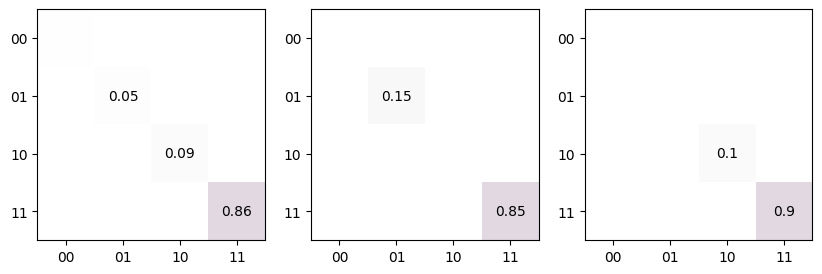

In [3]:
# create a sample circuit
circuit = tq.Circuit([{0: tq.Gate.x, 1: tq.Gate.y}, {(0, 1): tq.Gate.cz}])

# initialize a simulator with different dephasing rates on the qubits
bitflip = lambda p: [np.sqrt(1 - p) * np.eye(2), np.sqrt(p) * np.fliplr(np.eye(2))]
sim0 = tq.Simulator()
sim0.add_kraus(bitflip(0.05), match=tqs.LabelMatch(0))
sim0.add_kraus(bitflip(0.09), match=tqs.LabelMatch(1))

# initialize a simulator that targets only a specific gate
xmatch = tqs.GateMatch(tq.Gate.x)
sim1 = tq.Simulator().add_kraus(bitflip(0.15), match=xmatch)

# initialize a simulator that targets only specific gates on specific labels
sim2 = tq.Simulator()
gate_label_match = tqs.LabelMatch((1, 2)) & tqs.GateMatch([tq.Gate.y, tq.Gate.s])
sim2.add_kraus(bitflip(0.1), match=gate_label_match)

# plot the final states
plt.figure(figsize=(10, 3))
tq.plot_mat(sim0.state(circuit).mat(), ax=plt.subplot(131))
tq.plot_mat(sim1.state(circuit).mat(), ax=plt.subplot(132))
tq.plot_mat(sim2.state(circuit).mat(), ax=plt.subplot(133))

In [4]:
sim = tq.Simulator().add_overrotation(single_sys=0.1, match=tqs.GateMatch(tq.Gate.x))